In [1]:
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb

%load_ext autoreload
%autoreload 2

import os
from hydra import initialize_config_dir, compose
from omegaconf import OmegaConf

import pyrootutils

from napari_sparrow import utils
from datetime import datetime
log = utils.get_pylogger(__name__)

# project root setup
# searches for root indicators in parent dirs, like ".git", "pyproject.toml", etc.
# sets PROJECT_ROOT environment variable (used in `configs/paths/default.yaml`)
# loads environment variables from ".env" if exists
# adds root dir to the PYTHONPATH (so this file can be run from any place)
# https://github.com/ashleve/pyrootutils
root = pyrootutils.setup_root(os.getcwd(), dotenv=True, pythonpath=True)

abs_config_dir=os.path.abspath( os.path.join( root, "src/napari_sparrow/configs") )
with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    #cfg = compose(config_name="pipeline",  overrides= ['dataset=stereoseq_example',
    #                                                   'segmentation=cellpose_stereoseq_example',
    #                                                   'paths=output',
    #                                                   'clean=stereoseq_example',
    #                                                   'allocate=stereoseq_example',
    #                                                   'annotate=stereoseq_example'
    #                                                   ] )
    #cfg = compose(config_name="pipeline",  overrides= ['dataset=stereoseq_jdw',
    #                                                   'segmentation=cellpose_stereoseq_example',
    #                                                   'paths=output',
    #                                                   'clean=stereoseq_example',
    #                                                   'allocate=stereoseq_example',
    #                                                   'annotate=stereoseq_example'
    #                                                   ] )
    cfg = compose(config_name="pipeline",  overrides= ['dataset=resolve_liver',
                                                       'segmentation=cellpose_resolve_liver',
                                                       'paths=output',
                                                       'clean=resolve_liver',
                                                       'allocate=resolve_liver',
                                                       'annotate=resolve_liver',
                                                       'visualize=resolve_liver',
                                                       ] )
    #cfg = compose(config_name="pipeline",  overrides= ['dataset=resolve_melanoma_C_1_2',
    #                                                   'segmentation=cellpose_resolve_melanoma',
    #                                                   'paths=output',
    #                                                   'clean=resolve_melanoma',
    #                                                   'allocate=resolve_melanoma'
    #                                                   ] )
    #cfg = compose(config_name="pipeline",  overrides= ['dataset=vizgen_example',
    #                                                   'segmentation=cellpose_vizgen_example',
    #                                                   'paths=output',
    #                                                   'clean=vizgen_example',
    #                                                   'allocate=vizgen_example'
    #                                                   ] )


# the yaml root/configs/local/default.yaml is not used in this notebook, so we have to set data dir and log dir ourself

DATA_PATH_PREFIX = os.getenv("DATA_PATH_PREFIX")
os.makedirs( DATA_PATH_PREFIX, exist_ok=True )
cfg.paths.data_dir=DATA_PATH_PREFIX 

log_dir=os.path.join( DATA_PATH_PREFIX, 'logs' )
os.makedirs( log_dir, exist_ok=True )
cfg.paths.log_dir=log_dir

# Override output dir generated by hydra
# Get current date and time
now = datetime.now()
timestamp = now.strftime("%Y-%m-%d_%H-%M-%S")
# Create folder with timestamp as name
folder_name = timestamp
#folder_name='stereoseq'
output_dir=os.path.join( log_dir, cfg.task_name, 'notebook_runs' , folder_name )
os.makedirs( output_dir, exist_ok=True )
cfg.paths.output_dir=output_dir

print(OmegaConf.to_yaml(cfg))

subset: []
device: cpu
result: null
task_name: segment
tags:
- dev
dataset:
  data_dir: ${paths.data_dir}/resolve/resolve_liver
  dtype: tiff
  image: ${dataset.data_dir}/20272_slide1_A1-1_DAPI.tiff
  coords: ${dataset.data_dir}/20272_slide1_A1-1_results.txt
  markers: ${dataset.data_dir}/markerGeneListMartinNoLow.csv
  transform_matrix: null
segmentation:
  _target_: napari_sparrow.widgets._segment_widget.create_cellpose_method
  min_size: 80
  flow_threshold: 0.9
  diameter: 50
  cellprob_threshold: -4
  model_type: nuclei
  channels:
  - 0
  - 0
  small_size_vis:
  - 5000
  - 9000
  - 3000
  - 6000
  chunks: 2048
  crop_param: null
  voronoi_radius: null
paths:
  work_dir: ./
  data_dir: /Users/arnedf/VIB/DATA
  log_dir: /Users/arnedf/VIB/DATA/logs
  output_dir: /Users/arnedf/VIB/DATA/logs/segment/notebook_runs/2023-06-22_13-14-22
  h5ad: ${paths.output_dir}/adata.h5ad
  geojson: ${paths.output_dir}/adata.geojson
  sdata: ${paths.output_dir}/sdata.zarr
  tiling_correction: ${paths.o

/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/hydra/_internal/config_loader_impl.py:214: UserWarning: provider=hydra.searchpath in main, path=//configs is not available.
  warnings.warn(


In [2]:
import napari_sparrow.functions as fc
from napari_sparrow import pipeline_functions as pf
from napari_sparrow.single import check_config
import warnings

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [4]:
# for steroseq
#fc.reindex_count_matrix( input_path=cfg.dataset.coords, output_path=os.path.join( os.path.dirname( cfg.dataset.coords ) , 'transcripts_counts.csv' ) )

### Convert to zarr and load

In [3]:
# Checks the config paths, see the src/napari_sparrow/configs and local configs folder for settings
check_config(cfg)

# Supress _core_genes futerewarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

sdata = pf.load(cfg)

In [4]:
#fc.plot_image_container( ic,  layer='ssDNA_SS200000366BL_F3_regist', crd=[9000, 11000, 12000, 14000 ] )
#fc.plot_image_container( ic,  layer='ssDNA_SS200000366BL_F3_regist', crd=None )
#fc.plot_image_container( ic,  layer='ssDNA_SS200000366BL_F3_regist', crd=[ 500, 5000, 500, 5000 ] )
#ic_original=ic

In [5]:
#ic_original

ImageContainer[shape=(12864, 10720), layers=['raw_image']]

In [4]:
cfg.clean.small_size_vis

[5000, 9000, 3000, 6000]

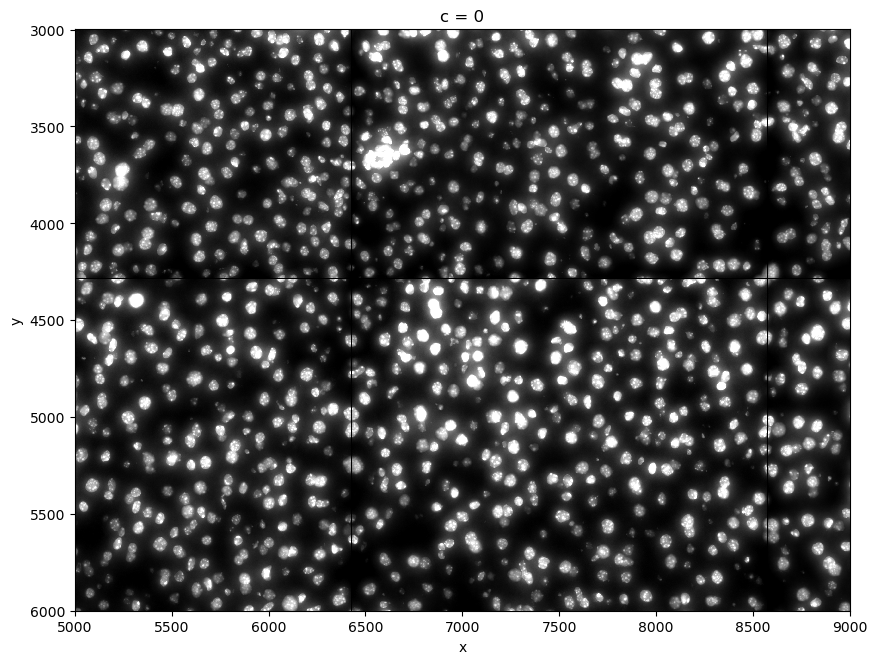

In [5]:
fc.plot_image_container( sdata, layer='raw_image', crd=cfg.clean.small_size_vis )

In [6]:
sdata = pf.clean(cfg, sdata)

/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/squidpy/im/_container.py:412: UserWarning: rename 'y' to 'y' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  img = img.rename(dict(zip(img.dims, dims)))
/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/squidpy/im/_container.py:412: UserWarning: rename 'x' to 'x' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  img = img.rename(dict(zip(img.dims, dims)))


/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/squidpy/im/_container.py:412: UserWarning: rename 'y' to 'y' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  img = img.rename(dict(zip(img.dims, dims)))
/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/squidpy/im/_container.py:412: UserWarning: rename 'x' to 'x' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  img = img.rename(dict(zip(img.dims, dims)))


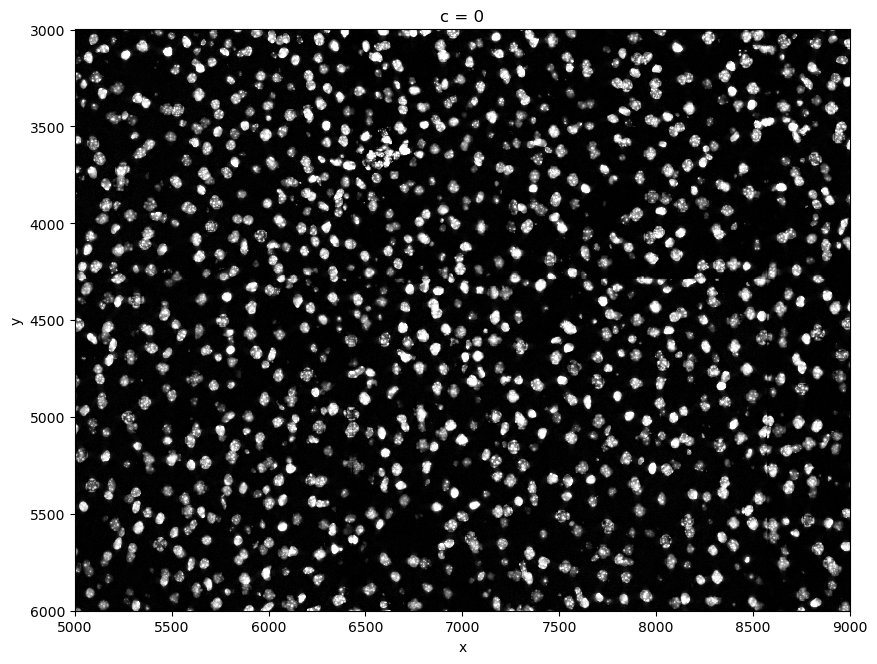

In [7]:
fc.plot_image_container( sdata,  layer='clahe', crd=cfg.clean.small_size_vis )

In [8]:
#fc.plot_image_container( ic,  layer='ssDNA_SS200000366BL_F3_regist', crd=[9000, 15000, 12000, 18000 ] )
#fc.plot_image_container( ic,  layer='ssDNA_SS200000366BL_F3_regist', crd=[ 500, 5000, 500, 5000 ] )

In [9]:
sdata = pf.segment(cfg, sdata )

/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/squidpy/im/_container.py:412: UserWarning: rename 'y' to 'y' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  img = img.rename(dict(zip(img.dims, dims)))
/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/squidpy/im/_container.py:412: UserWarning: rename 'x' to 'x' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  img = img.rename(dict(zip(img.dims, dims)))
no parent found for <ome_zarr.reader.Label object at 0x2c31e7d30>: None
/Users/arnedf/miniconda3/envs/napari-sparrow/lib/python3.10/site-packages/rasterio/features.py:128: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  for s, v in _shapes(source, mask, connectivity, transform):
/Users/arnedf/miniconda3/envs/napari-sparrow/li

In [10]:
sdata = pf.allocate( cfg, sdata )

No transform matrix given, will use identity matrix.
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
creating masks from polygons
Created masks with shape (12864, 10720)
Calculate cell counts
Create anndata object
271 cells were filtered out based on size.
Start clustering


4
plot transcripts matrix for cell 130 and gene Ghr
Plotting 37 transcripts.
Selecting boundaries
Plotting boundaries
End plotting boundaries


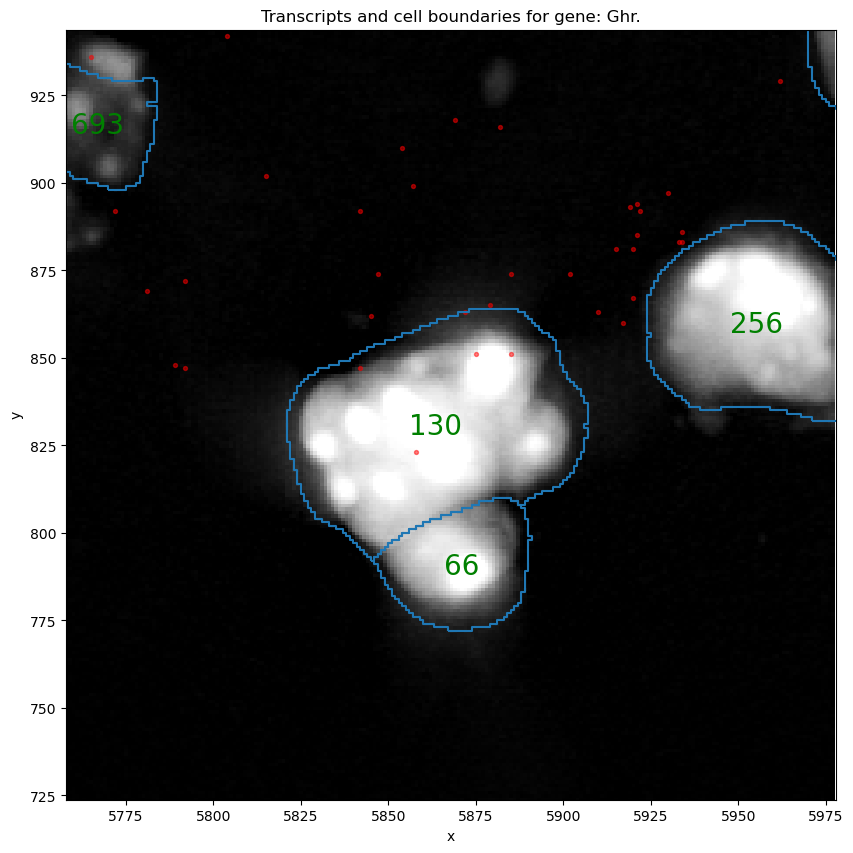

In [11]:
import dask.dataframe as dd

ddf=dd.read_parquet( os.path.join( output_dir, 'detected_transcripts_transformed.parquet' )  )

random_cell='130'
random_gene='Ghr'
 
print( sdata.table.layers[ 'raw_counts' ][  sdata.table.to_df().index.get_loc( random_cell ), sdata.table.to_df().columns.get_loc( random_gene )  ] )

diameter=60

if random_cell is not None and random_gene is not None:

    cell_center= sdata.table.obsm[ 'spatial' ][ sdata.table.to_df().index.get_loc( str(random_cell) ) ]
    crd=[ cell_center[0] - (diameter +50 ),
            cell_center[0] + (diameter +50 ),
            cell_center[1] - (diameter +50 ),
            cell_center[1] + (diameter +50 ) ]

    print( f"plot transcripts matrix for cell {random_cell} and gene {random_gene}" )

    fc.sanity_plot_transcripts_matrix(
        xarray=sdata[ 'clahe' ],
        in_df=ddf,
        crd=crd,
        polygons=sdata[ 'nucleus_boundaries' ],
        plot_cell_number=True,
        gene=random_gene,
        )

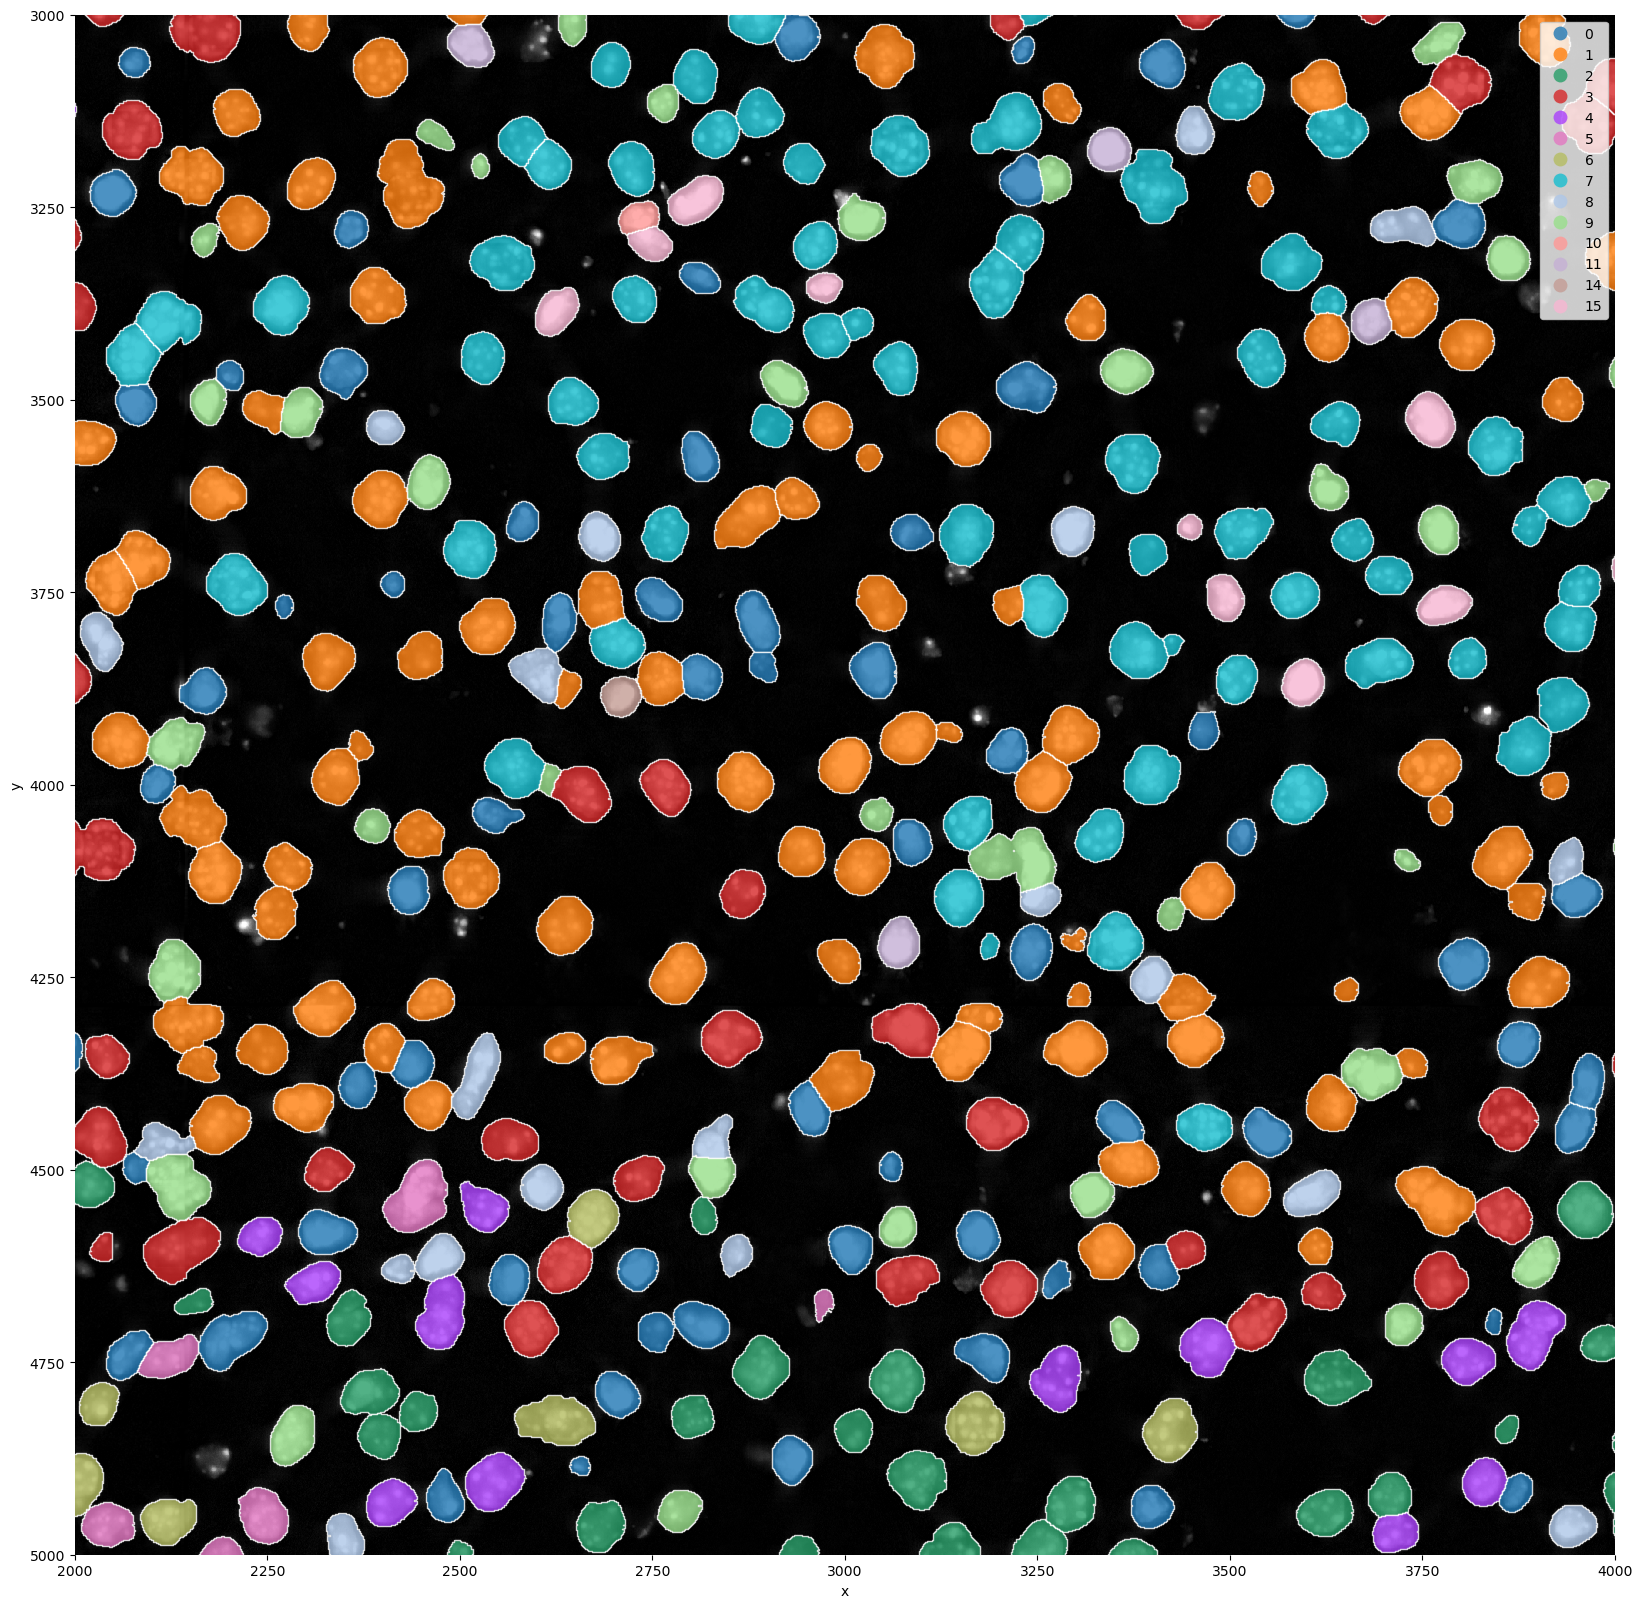

In [12]:
crd = [2000, 4000, 3000, 5000]

fc.plot_shapes(
    sdata, 
    column="leiden", 
    crd=crd, 
    alpha=0.8, 
    shapes_layer='nucleus_boundaries' 
    )

In [13]:
sdata, mg_dict = pf.annotate( cfg, sdata )

In [14]:
sdata=pf.visualize( cfg, sdata, mg_dict )

  0%|          | 0/1000 [00:00<?, ?/s]